In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
df=pd.read_csv("insurance.csv")
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\pc\AppData\Local\Temp\ipykernel_16132\3991160951.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'sex':{'male':0,'female':1}}, inplace=True)
C:\Users\pc\AppData\Local\Temp\ipykernel_16132\3991160951.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'smoker':{'yes':0,'no':1}}, inplace=True)
C:\Users\pc\AppData\Local\Temp\ipykernel_16132\3991160951.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly

<Axes: >

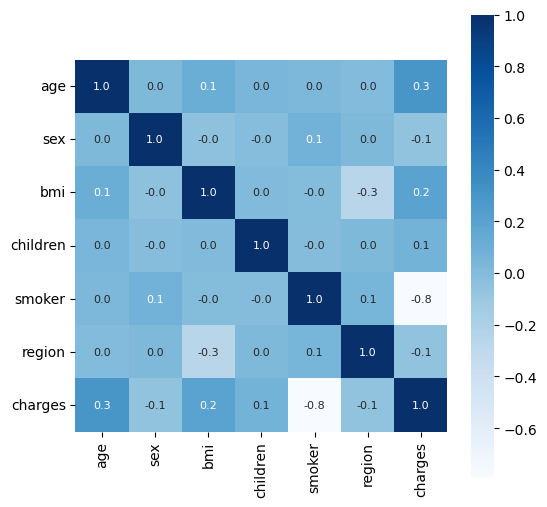

In [3]:

# encoding sex column
df.replace({'sex':{'male':0,'female':1}}, inplace=True)
3 # encoding 'smoker' column
df.replace({'smoker':{'yes':0,'no':1}}, inplace=True)
# encoding 'region' column
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

correlation=df.corr()
plt.figure(figsize=(6,6))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [4]:
x_train=df.drop(["charges"],axis=1).values
y_train=df["charges"].values

In [5]:
x_norm=StandardScaler().fit_transform(x_train)
x_norm,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.2,random_state=41)
print(x_norm.shape)

(1070, 6)


In [6]:
max_dgree=9
err_cv=np.zeros(max_dgree)
err_train=np.zeros(max_dgree)
for i in range(max_dgree):
    pol=PolynomialFeatures(i+1,include_bias=False)
    # normlize data training
    x_pol=pol.fit_transform(x_norm)
    # normlize data cv
    x_p=pol.fit_transform(x_test)
    # train model 
    model=LinearRegression()
    model.fit(x_pol,y_train)
    # prediction 
    y_hat_cv=model.predict(x_p)
    y_hat=model.predict(x_pol)
    err_cv[i]=mean_squared_error(y_test,y_hat_cv)/2
    err_train[i]=mean_squared_error(y_train,y_hat)/2
optimal_degree=np.argmin(err_cv)+1
print(optimal_degree)
print(err_train)
print(err_cv)

3
[18478396.0604679  11241173.18618122 10548909.62836881  9480598.10944329
  7905586.49640738  5777859.31528887  3610526.66604817  3670510.9079703
  1712053.031851  ]
[1.77158179e+07 1.18233115e+07 1.17830251e+07 1.53492073e+07
 2.29583663e+07 7.63272801e+11 4.88135296e+12 1.19522626e+13
 1.92259018e+14]


In [7]:
pol=PolynomialFeatures(optimal_degree,include_bias=False)
x_train=pol.fit_transform(x_norm)
x_test=pol.fit_transform(x_test)
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
error_score =r2_score(y_test, y_pred)
print("R squared Error : ", error_score*100)
for i in range(20):
    print(y_pred[i],"=>",y_test[i])

R squared Error :  79.03816366139618
5728.264229476354 => 4076.497
12381.632111779076 => 12224.35085
5601.932400498938 => 3857.75925
6844.88377335057 => 6571.02435
3706.3431021392425 => 2927.0647
11218.879684503368 => 9290.1395
37160.87175410817 => 36397.576
12788.410159311887 => 26467.09737
8483.998888621038 => 6940.90985
6855.9655081622495 => 3443.064
30608.578902737983 => 36021.0112
13318.83515085969 => 11512.405
3210.6613532842075 => 3353.4703
31306.953912918634 => 34838.873
2112.281566057809 => 2026.9741
11478.763715670306 => 9140.951
14232.507054390095 => 13822.803
7023.778981895059 => 5630.45785
15556.902345936625 => 13112.6048
24282.41120714068 => 24873.3849


In [8]:
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)
print(input_data_as_numpy_array.shape)
# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
input_data_reshaped=pol.fit_transform(input_data_reshaped)
prediction = model.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

(6,)
[3147.48516922]
The insurance cost is USD  3147.4851692169686
